# Sieć neuronowa z pobudzeniem periodycznym

*RK, AK, AS, APPA **100** (2001)*

$$
S_i(t+1)=\tanh(g h_i(t)+I(t))
$$

$$
h_i(t) = \sum \limits_j J_{ij} S_j(t)
$$

- $h_i(t)$ - pole lokalne działające na $i$-ty neuron
- $J_{ij} \in [-1,1]$ - połączenie synaptycze między neuronami $i$ i $j$
- obserwujemy globalną dynamikę: $\sigma(t) = \frac{1}{N}\sum \limits_{i=1}^N[S_i(0)-S_i(t)]^2$


In [1]:
using PyPlot
using JLD

In [2]:
# activation
f(x, g, I)=tanh.(g.*x.+I);
# f(x, g=1, I=0)=tanh.(g.*x);

# local field
h(S,J)=J*S

# external stimulation
I(t,A,T)=A*sin(2π/T * t);

In [3]:
next_state(S, J, g, A, T, t)=f.(h(S,J),g,I(t,A,T))

next_state (generic function with 1 method)

In [4]:
# dev()=sum((S-S0).^2)/N
dev()=sum(S.^2)/N

dev (generic function with 1 method)

In [5]:
function step()
    global S=next_state(S, J, g, A, T, t)
    global t+=1
    dev()
end

step (generic function with 1 method)

In [6]:
A=1
T=24

24

In [7]:
# number of neurons
N=64

# neuron states
# S=2 .*rand(N).-1;
S=zeros(N)
S0=S;

In [8]:
# connections
# J=2 .*rand(N,N).-1;
# J=rand((1,-1,0,0),N,N);  # rozrzedzona sieć

In [9]:
J=load("w64_02.jld","J"); # 0.28624 (b.H.), 0.29 (QP), 0.291 (T=7), 0.294 (QP), 0.295 (QP-C)
# J=load("w64_03.jld","J"); # 0.24 (T=1), 0.25, 0.265, 0.27, 0.28 (QP), 0.2838->0.2839 (QP->P), 0.29, 0.3 (P), 0.302 (QP), 0.31 (C)

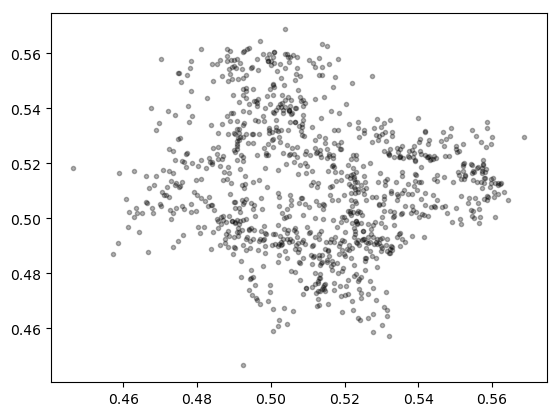

In [10]:
g=0.31
t=0
for i in 1:1000T
    step();
end

tt=1:1000T
x=[step() for i in tt];
plot(x[1:T:end-T],x[T+1:T:end],alpha=0.3,"k.");

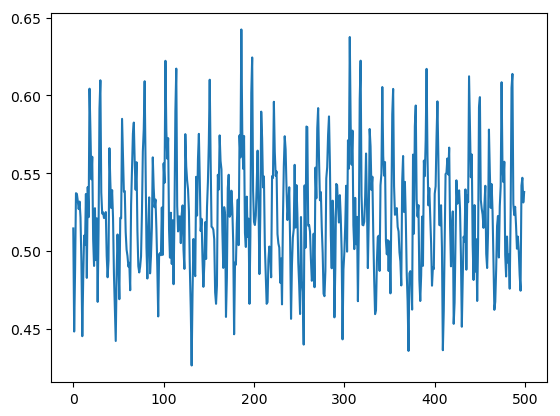

In [11]:
plot(x[1:500]);

In [12]:
# save("w64_04.jld","J",J)